## Dow Jones Industrial's clossing price prediction with restricted or unrestricted model is good? (provided clossing price is autocorrelated)

### Import libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

## Read data and create unrestricted & mean intercept (restricted) datas

In [3]:
file = r'.\Dow Jones Industrial closing price\djia.csv'
df = pd.read_csv(file, header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

### 1) mean intercept model

In [4]:
mean = round(df['Closing Price'].mean(),2)
y_pred_mean_intercept = pd.DataFrame(data=np.full(len(df['Closing Price']), mean), columns=['y_mean_intercept'])

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


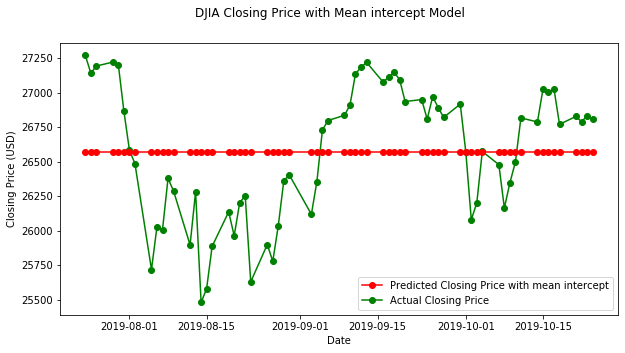

In [5]:
fig = plt.figure(figsize = (10, 5))

fig.suptitle('DJIA Closing Price with Mean intercept Model')
actual, = plt.plot(df.index, df['Closing Price'], 'go-', label='Actual Closing Price')
predicted, = plt.plot(df.index, y_pred_mean_intercept, 'ro-', label='Predicted Closing Price with mean intercept')

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(handles=[predicted, actual])
plt.show()

### 2) unrestricted model with new column with lagged value of clossing price

In [6]:
#Add the lagged column
df['CP_LAGGED'] = df['Closing Price'].shift(1)

In [7]:
#Let's remove the first row as it contains an NaN:
df_lagged = df.drop(df.index[0])

In [8]:
df_lagged.head()

,Closing Price,CP_LAGGED
Date,,
2019-07-25,27140.98047,27269.97070
2019-07-26,27192.44922,27140.98047
2019-07-29,27221.34961,27192.44922
2019-07-30,27198.01953,27221.34961
2019-07-31,26864.26953,27198.01953


In [9]:
split_index = round(len(df_lagged)*0.8)
split_date = df_lagged.index[split_index]
df_train = df_lagged.loc[df_lagged.index <= split_date].copy()
df_test = df_lagged.loc[df_lagged.index > split_date].copy()
X_train = add_constant(df_train['CP_LAGGED'])
X_test = add_constant(df_test['CP_LAGGED'])
y_train = df_train['Closing Price']
y_test = df_test['Closing Price']

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
#Construct and fit the OLS regression model:
ols_model = OLS(y_train,X_train)
ols_results = ols_model.fit()

In [11]:
#Use the fitted model to make predictions on the training and testing data sets:
y_pred_train = ols_results.predict(X_train)
y_pred_test = ols_results.predict(X_test)

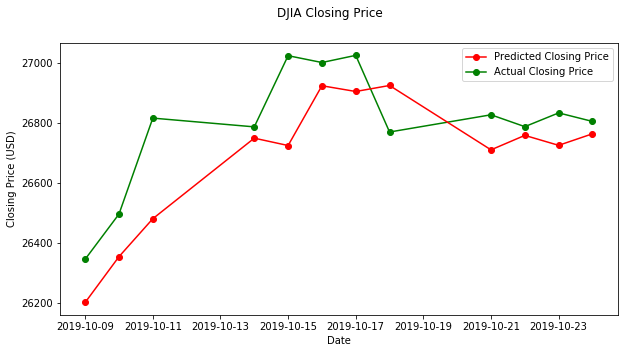

In [12]:
#Plot the model's performance against the test data set:
fig = plt.figure(figsize = (10, 5))
fig.suptitle('DJIA Closing Price')
actual, = plt.plot(df_test.index, y_test, 'go-', label='Actual Closing Price')
predicted, = plt.plot(df_test.index, y_pred_test, 'ro-', label='Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(handles=[predicted, actual])
plt.show()

In [13]:
#print the summary of regression results
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:          Closing Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     136.7
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           4.84e-16
Time:                        22:48:32   Log-Likelihood:                -370.13
No. Observations:                  53   AIC:                             744.3
Df Residuals:                      51   BIC:                             748.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4233.3797   1905.887      2.221      0.0

In [14]:
ols_results.f_pvalue > .05

False

### Thus we reject the Null hypothesis and accept the alternate hypothesis H_1 that the complex model, i.e. the lagged variable model, in spite of its obvious flaws, is able to explain the variance in the dependent variable Closing Price better than the intercept-only model.